In [1]:
%matplotlib inline
# %matplotlib qt
# import mpld3
# mpld3.enable_notebook() # seems to just freeze the stuff a bit
# import matplotlib
# matplotlib.use('nbagg') # also slow AF

In [2]:
from __future__ import print_function, division
import os, sys
import numpy as np, scipy as sp, pandas as pd
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
e = np.exp(1)
pi = np.pi
pii = np.pi*1j
twopi = np.pi * 2

In [4]:
import pywt
import pyhht
import pyhht.emd

In [5]:
from imp import reload
import auxfilter
import glob

In [6]:
# os.chdir('..')
os.chdir('/home/mike/venvs/ml/ml/py')
print(os.getcwd())
from eegkaggle.vectorizers import naive, spectral
from eegkaggle.dio import dataio
from eegkaggle.plotting import plotstuff
from eegkaggle.msignal import wavelets, metrics

/home/mike/venvs/ml/ml/py


In [7]:
reload(plotstuff)
reload(dataio)
reload(spectral)

<module 'eegkaggle.vectorizers.spectral' from 'eegkaggle/vectorizers/spectral.pyc'>

In [8]:
matplotlib.style.use('ggplot')
colors = ['k', 'r', 'g', 'c', 'm', 'y']


In [9]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slarge

Functions

In [10]:
basepath = '/home/mike/Downloads/train_1/'
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 

basepathT = '/media/mike/Elements/data/kaggle/melbourne/test_3/'
basepathT = '/home/mike/Downloads/test_1_new/'

sourcesT = glob.glob(basepath + '*.mat') 


In [35]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
data = pd.read_csv('/media/mike/Elements/data/kaggle/melbourne/train_all/submit_1478496675.38.csv')

# data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)
labels = [name[-5] for name in data['File']]
data['label'] = pd.to_numeric(pd.Series(labels))

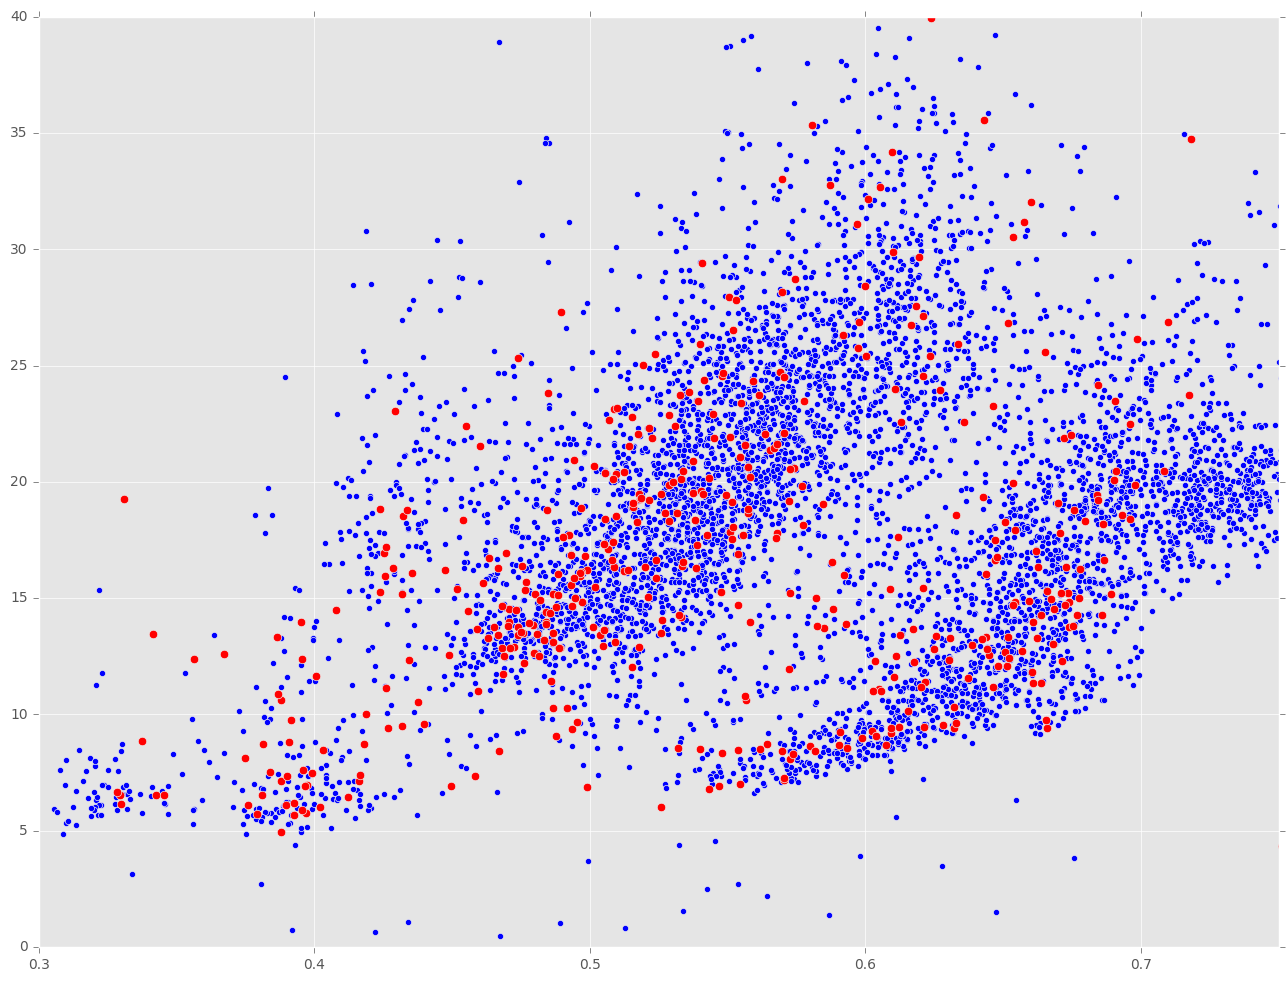

In [15]:
d0 = data[data['label'] == 0]
d1 = data[data['label'] == 1]
plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r', marker='.', s=150)
x = np.linspace(0.3,.7, 10)
plt.xlim([.3,.75])
plt.ylim([0, 40])
y = -40*x + 40
# plt.plot(x, y)

In [16]:
print(np.corrcoef(data[['hurst', 'chanstd', 'ccmean', 'ccstd']],rowvar=0))

[[ 1.          0.38462533 -0.1782399   0.67211227]
 [ 0.38462533  1.          0.36448607  0.49350022]
 [-0.1782399   0.36448607  1.          0.18243074]
 [ 0.67211227  0.49350022  0.18243074  1.        ]]


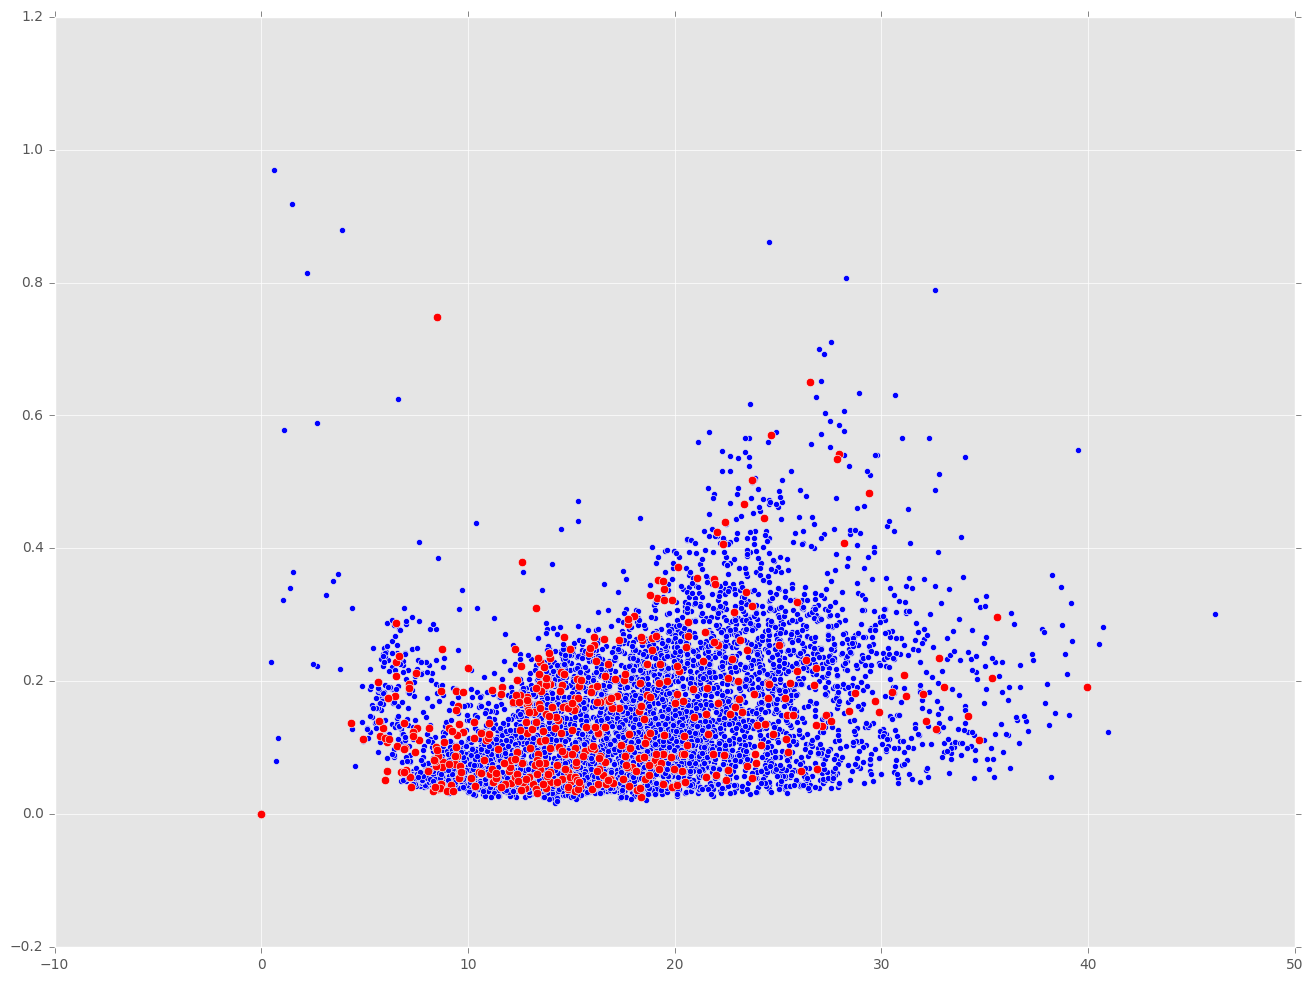

In [21]:
x = 'chanstd'
y = 'ccmean'
plt.scatter(d0[x], d0[y])
plt.scatter(d1[x], d1[y], c='r', marker='.', s=150)

In [22]:
clf = svm.SVC()
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()
y = data['label'].as_matrix()

In [23]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
vec = x[1]
clf.predict(vec.reshape(1,-1))

array([0])

In [29]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans)
    

In [30]:
data['guess'] = pd.Series(guess)

In [31]:
score = data['label'] == data['guess']
score.mean()

0.92567455719251779

# Woah! Probably overfitting. but nice score.

In [34]:
# data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
datatest = pd.read_csv('/home/mike/Downloads/test_new/submit_1478497925.88.csv')

datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0


In [36]:
x = data[['hurst', 'chanstd', 'ccmean', 'ccstd']].as_matrix()


In [39]:
guess =[]
for i in range(len(data)):
    vec = x[i].reshape(1,-1)
    ans = clf.predict(vec)
    guess.append(ans[0])

In [40]:
datatest['guess'] = pd.Series(guess)
datatest.head()

,Unnamed: 0,hurst,chanstd,ccmean,ccstd,File,Class,guess
0,0,0.543553,15.974331,0.141321,0.290573,new_2_907.mat,1,0
1,1,0.599508,10.851130,0.083844,0.300162,new_3_521.mat,1,0
2,2,0.555639,20.826307,0.277197,0.307219,new_2_435.mat,0,0
3,3,0.721421,20.126127,0.084893,0.333722,new_3_245.mat,0,0
4,4,0.585319,17.870054,0.172700,0.347513,new_1_23.mat,0,0


In [41]:
datatest.to_csv('/home/mike/kaggle/melbourne/svm001.csv')

In [56]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data[['hurst', 'chanstd']])

In [57]:
data['km'] = pd.Series(kmeans.labels_)

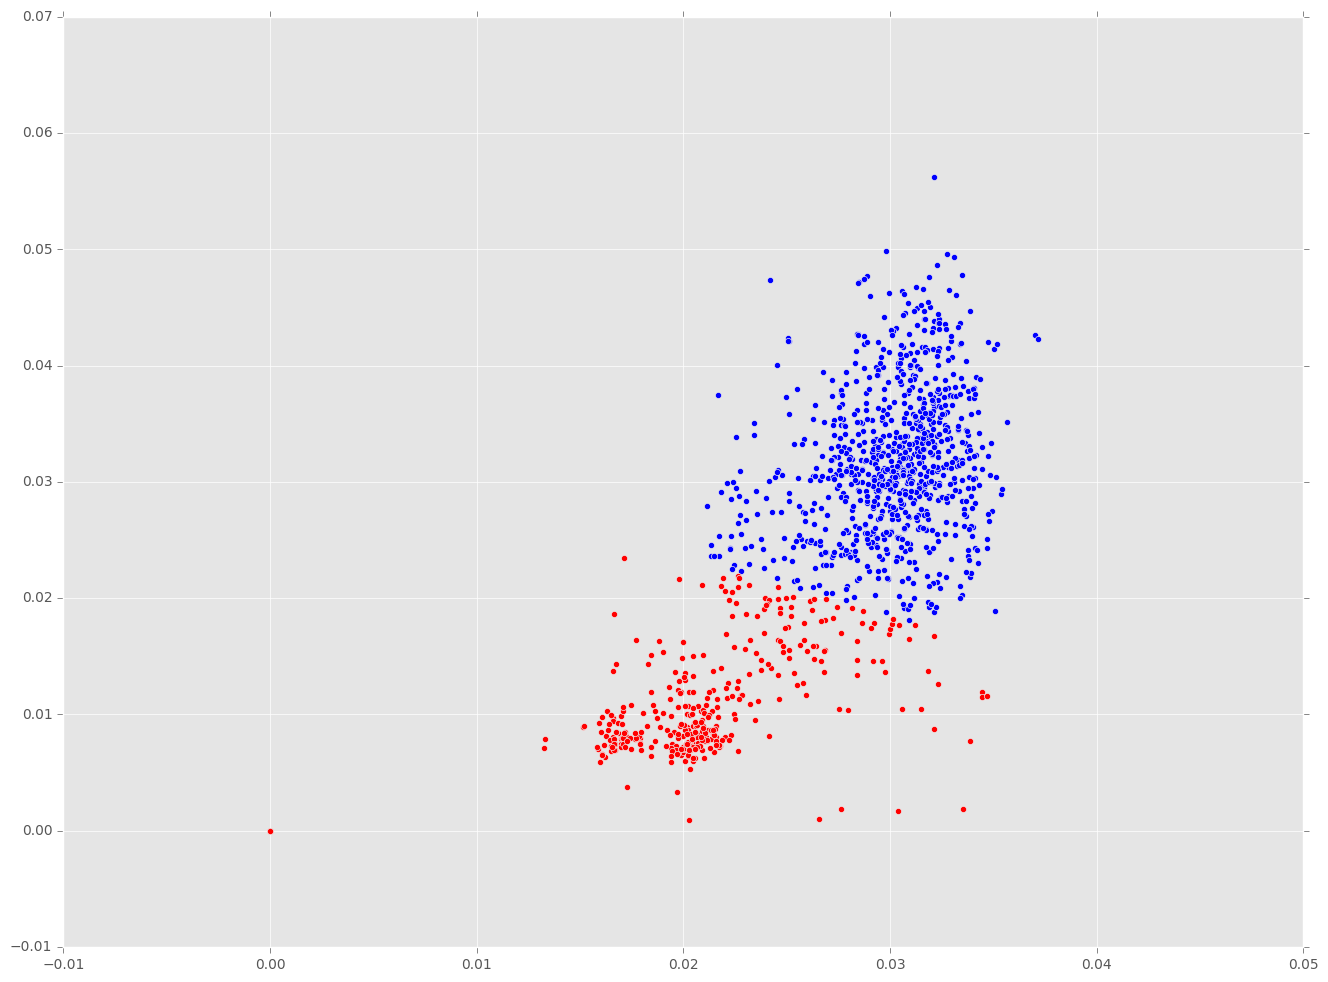

In [58]:
d0 = data[data['km'] == 0]
d1 = data[data['km'] == 1]
d2 = data[data['km'] == 2]

plt.scatter(d0['hurst'], d0['chanstd'])
plt.scatter(d1['hurst'], d1['chanstd'], c='r')
plt.scatter(d2['hurst'], d2['chanstd'], c='c')

In [59]:
score = data['km'] == data['label']
score.mean()

0.69715603382013835

In [76]:
data = pd.read_csv('/home/mike/Downloads/test_new/submit_1478483249.67.csv')
data[['hurst', 'chanstd']] = normalize(data[['hurst', 'chanstd']] ,axis=0)

In [77]:
labels = [name[4] for name in data['File']]
data['set'] = pd.to_numeric(pd.Series(labels))

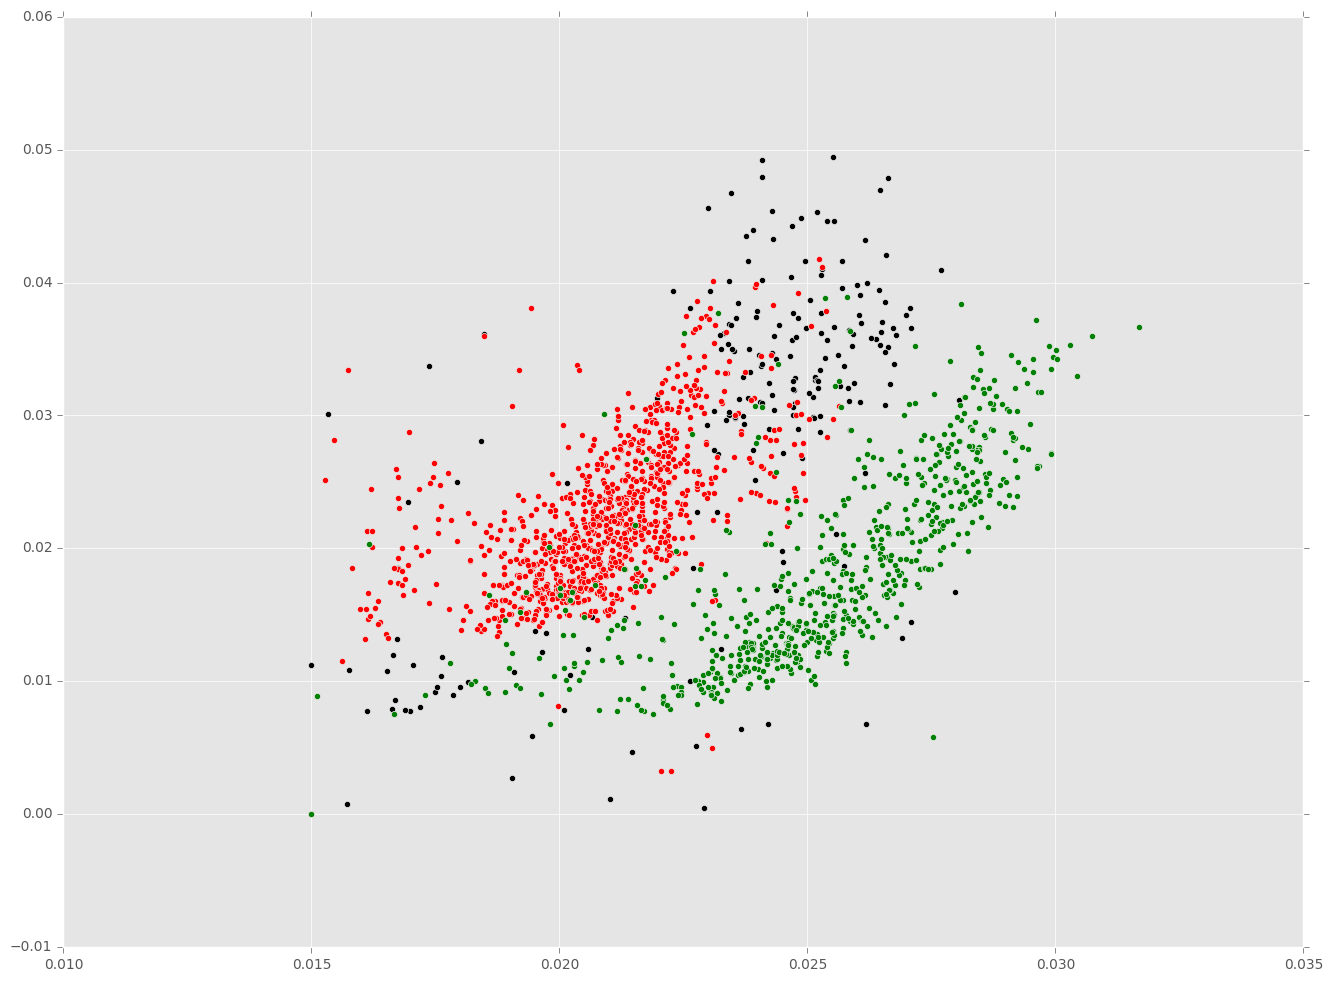

In [93]:
dx = []
for n in range(0,4):
    dx.append(data[data['set'] == n])
    plt.scatter(np.clip(dx[n]['hurst'],.015,.04), dx[n]['chanstd'], c=colors[n-1])

In [79]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data[['hurst', 'chanstd']])
data['km'] = pd.Series(kmeans.labels_)

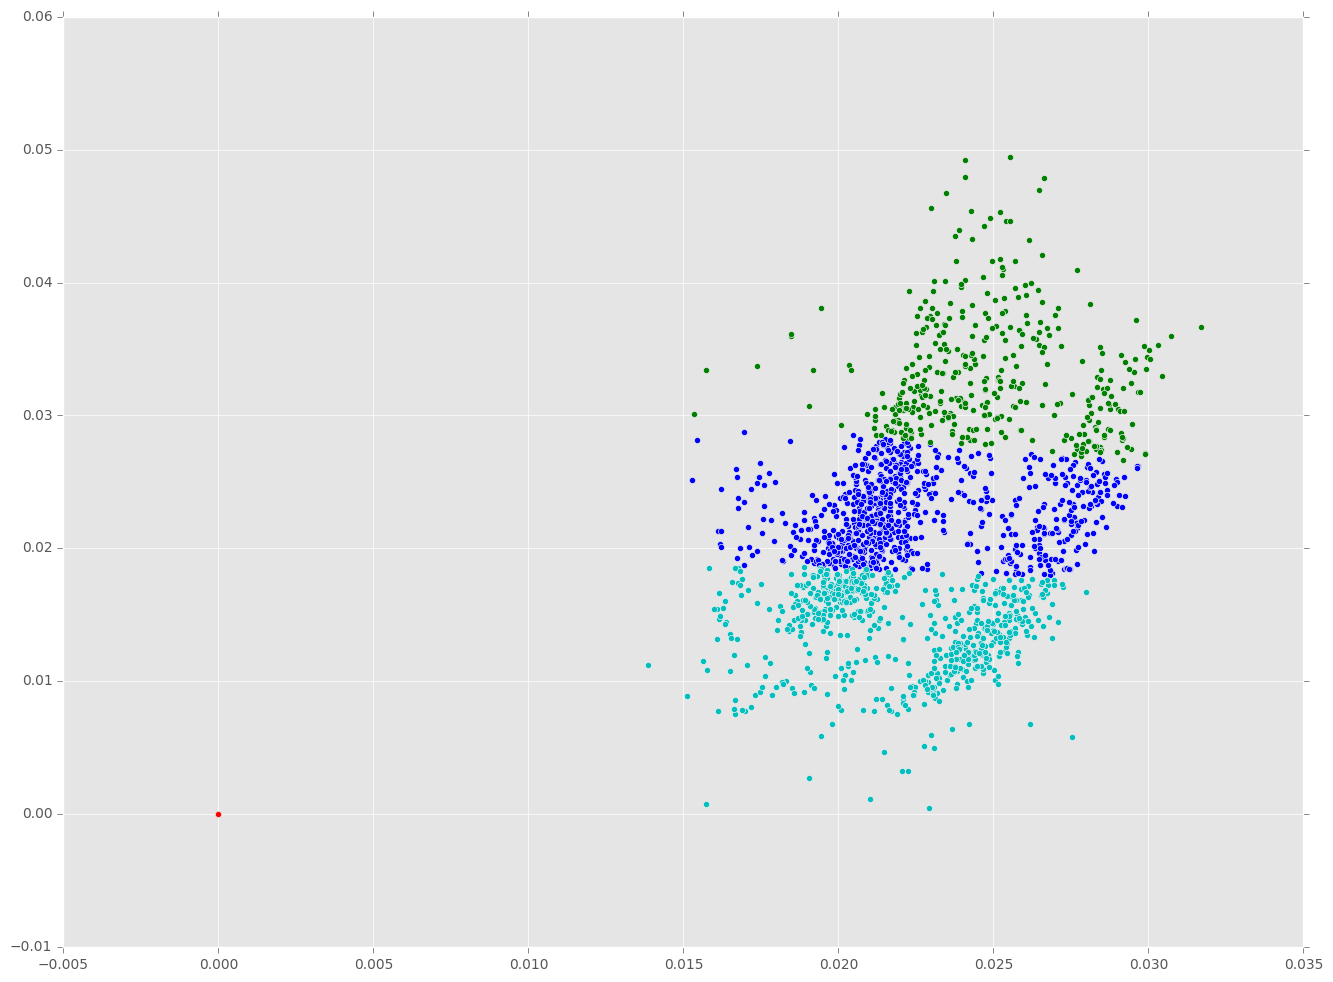

In [80]:
dx = []
# d0 = data[data['km'] == 0]
# d1 = data[data['km'] == 1]
# d2 = data[data['km'] == 2]
for n in range(n_clusters):
    dx.append(data[data['km'] == n])

for n in range(n_clusters):
    plt.scatter(dx[n]['hurst'], dx[n]['chanstd'], c=colors[n])
# plt.scatter(d1['hurst'], d1['chanstd'], c='r')
# plt.scatter(d2['hurst'], d2['chanstd'], c='c')

In [96]:
data_t1 = pd.read_csv('/home/mike/Downloads/train_1/submit_1478483889.61.csv')
data_t1[['hurst', 'chanstd']] = normalize(data_t1[['hurst', 'chanstd']] ,axis=0)
data_t3 = pd.read_csv('/home/mike/Downloads/train_1/submit_1478483889.61.csv')
data_t3[['hurst', 'chanstd']] = normalize(data_t1[['hurst', 'chanstd']] ,axis=0)

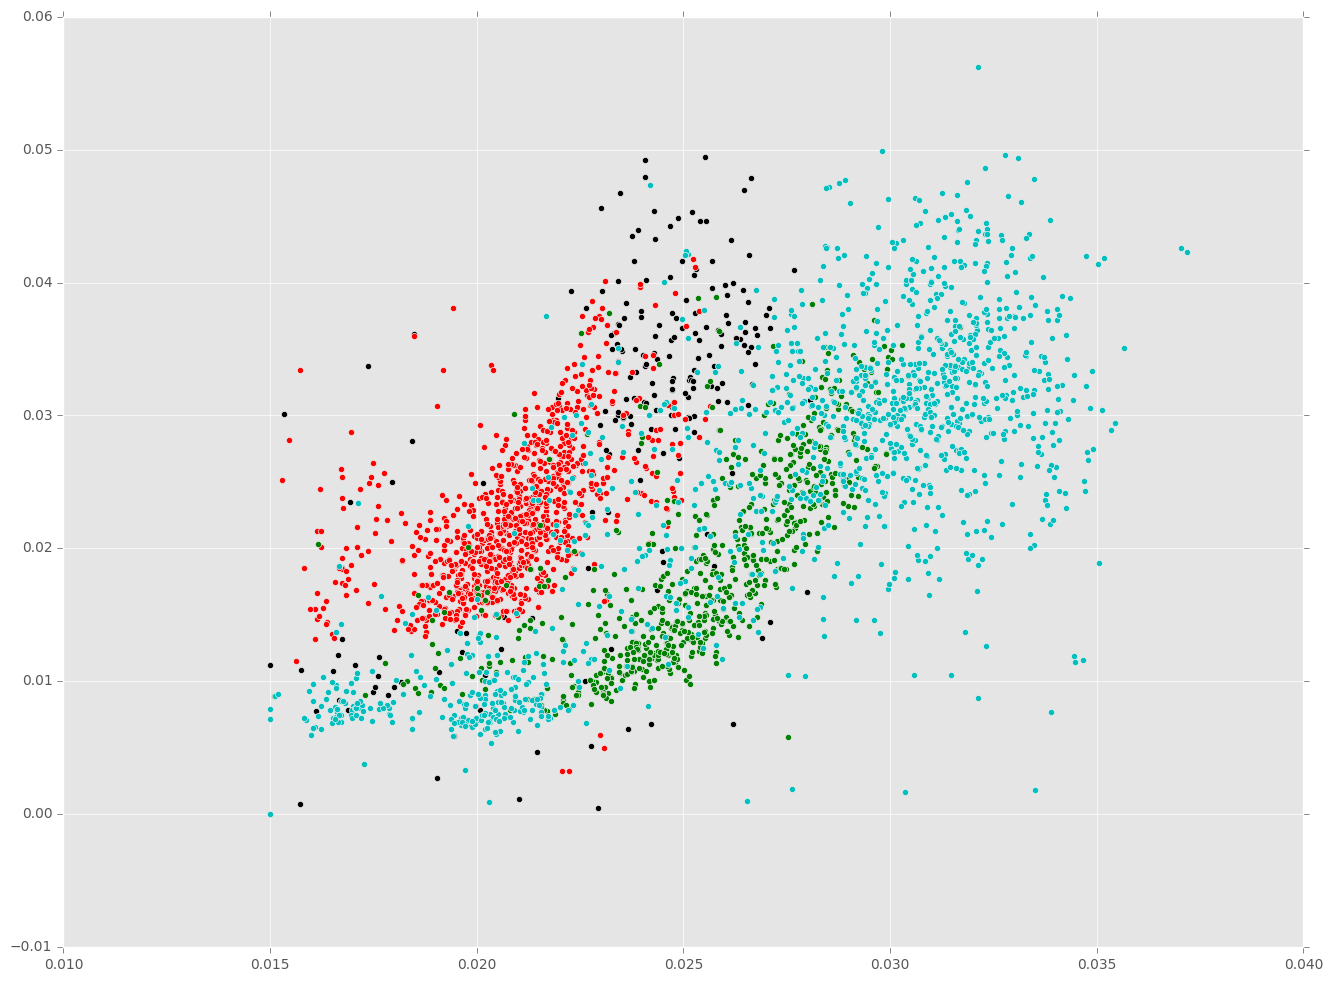

In [101]:
dx = []
for n in range(0,4):
    dx.append(data[data['set'] == n])
    plt.scatter(np.clip(dx[n]['hurst'],.015,.04), dx[n]['chanstd'], c=colors[n-1])
    
plt.scatter(np.clip(data_t1['hurst'], 0.015, 0.04), data_t1['chanstd'], c='c')

In [184]:
nfile = 120
d0 = dataio.get_matlab_eeg_data_ary(sources0[nfile])
d1 = dataio.get_matlab_eeg_data_ary(sources1[100])
matplotlib.rcParams['figure.figsize'] = slong

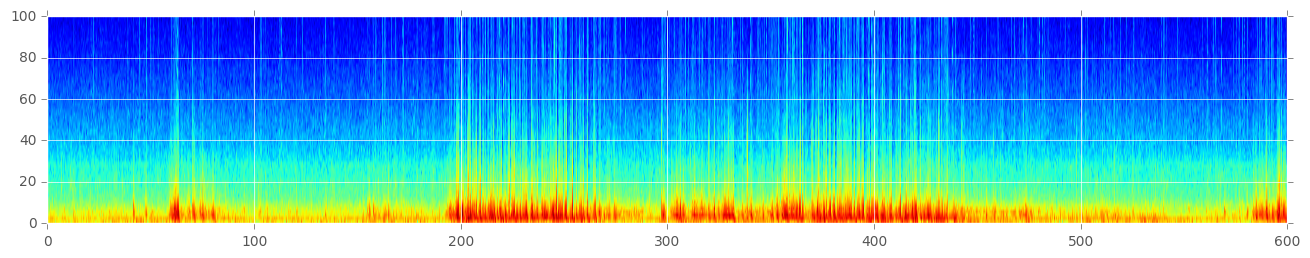

In [186]:
# plt.plot(d1)
spec0 = spectral.file_to_fig(sources0[nfile], returnspec=1)

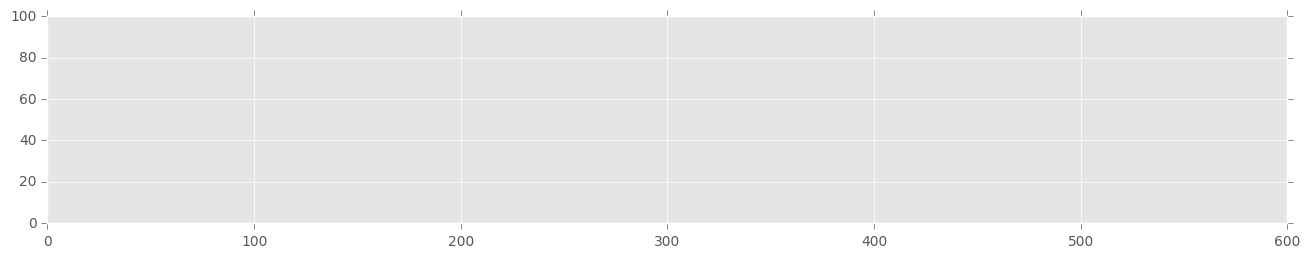

In [187]:
spec1 = spectral.file_to_fig(sources1[nfile], returnspec=1)

In [188]:
spec0.shape

(3750, 64, 16)

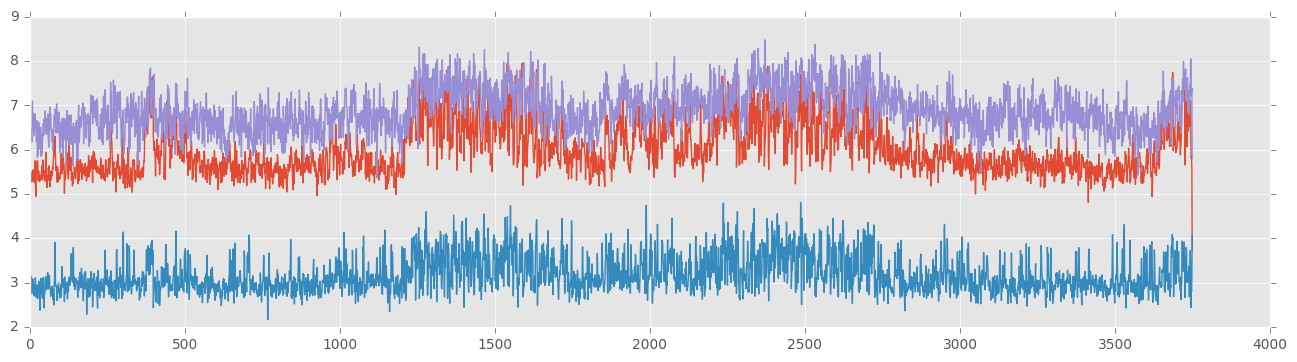

In [189]:
plt.plot(np.average(spec0[:,6], axis=1))
plt.plot(np.average(spec0[:,60], axis=1))
plt.plot(np.average(spec0[:,0], axis=1))

(4, 6)

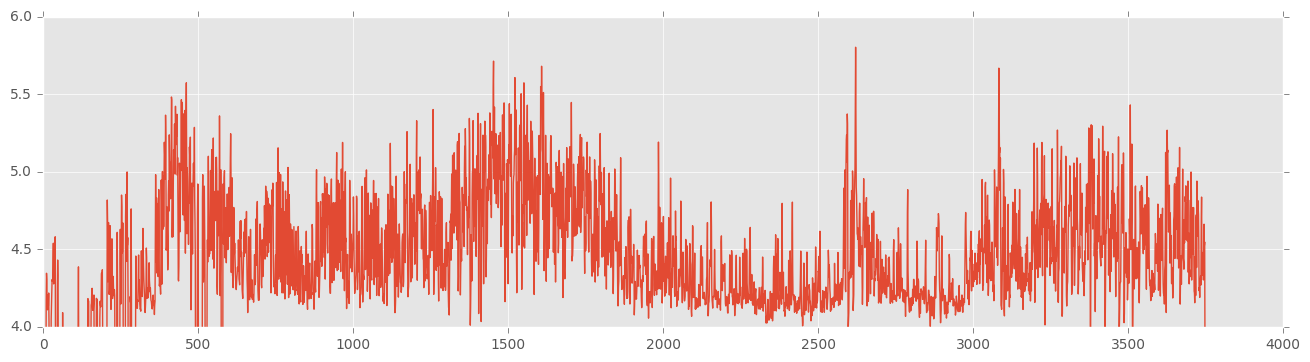

In [169]:
spikesig = np.average(np.average(spec0, axis=2), axis=1)
plt.plot(spikesig)
plt.ylim(4,6)
# plt.plot(np.average(d0, axis=1)[::64])

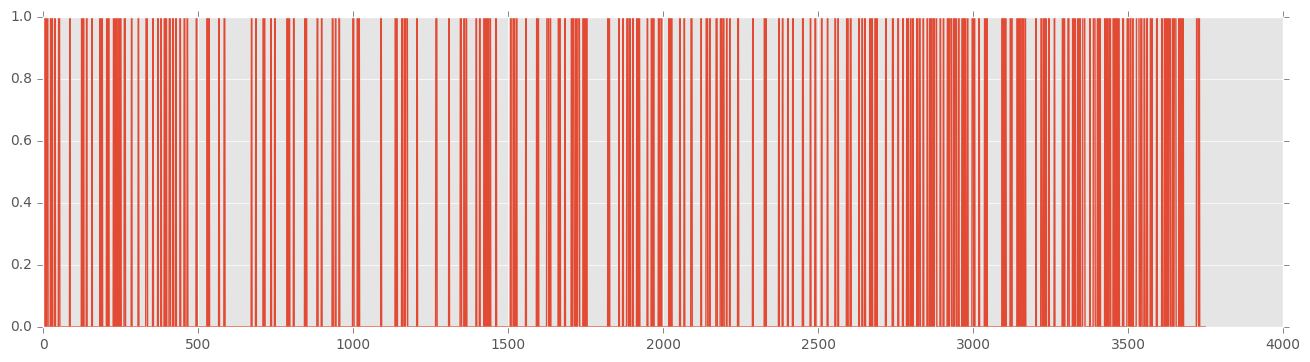

In [172]:
plt.plot(np.average(np.average(spec1, axis=2), axis=1)>4.25)
# plt.ylim(4,6)

/home/mike/venvs/ml/ml/local/lib/python2.7/site-packages/numpy/lib/function_base.py:1578: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


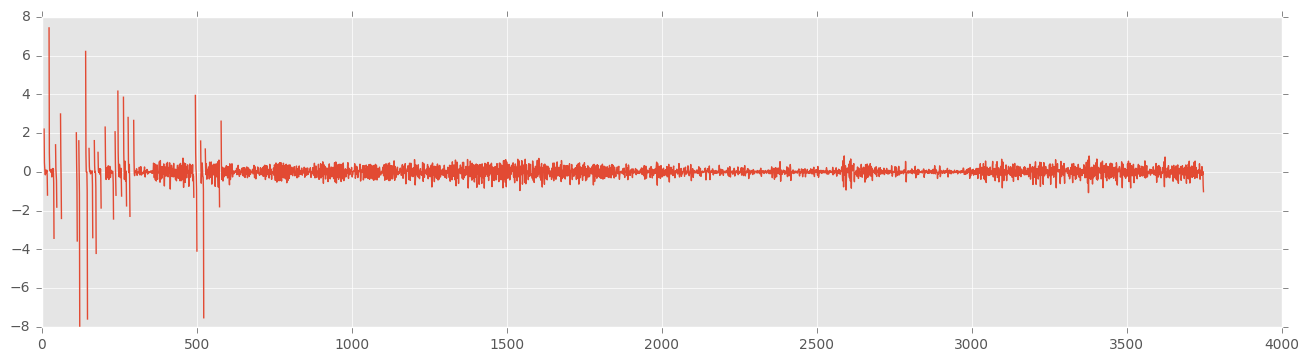

In [170]:
plt.plot(np.diff(spikesig))